In [4]:
# Syllabus after Midsems
# Naive Bayes
# K- Nearest Neigbours
# Decision Trees
# K-means Clustering
# Hierarchial Clustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Naive Bayes

In [4]:
p_hostel = 0.6
p_day_scholars = 0.4




## K-Nearest Neighbours

In [47]:
class knn:
    def __init__(self, k=3, dist='euclidian'):
        self.k = k
        self.dist = dist
        if dist == 'euclidian':
            self.s = 2
        elif dist == 'manhattan':
            self.s = 1
        else:
            self.s = 3
    
    def distance(self, vec1, vec2):
        return (np.sum(np.abs((vec2 - vec1) ** self.s))) ** (1 / self.s)
    
    def fit(self, data, labelCol:str = 'label'):
        self.df = data
        self.labelCol = labelCol
    
    def predict(self, data):
        X = self.df.drop(self.labelCol, axis=1).values
        Y = self.df[self.labelCol].values
        pred = []
        for item in data:
            distances = [self.distance(x, item) for x in X]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = Y[k_indices]
            values, counts = np.unique(k_labels, return_counts=True)
            pred.append(values[np.argmax(counts)])
        
        return pred

In [53]:
class Knn:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, df, labelCol: str = 'label'):
        self.df = df
        self.labelCol = labelCol
    
    def distance(self, vec1, vec2):
        return np.sqrt(np.sum((vec2 - vec1) ** 2))
    
    def predict(self, data):
        X = self.df.drop(self.labelCol, axis=1).values
        Y = self.df[self.labelCol].values
        predictions = []
        for row in data:
            distances = [self.distance(row, x) for x in X]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = Y[k_indices]
            values, counts = np.unique(k_labels, return_counts=True)
            majority_label = values[np.argmax(counts)]
            predictions.append(majority_label)
        return predictions

In [54]:
df = pd.read_csv('../Week8/datasets/q1_data.csv')

model = Knn()
model.fit(df.drop('id', axis=1))

pred = model.predict([[160, 5.5]])
print(f'Prediction for Weight=165, sweetness=5.5 is {pred}')

Prediction for Weight=165, sweetness=5.5 is ['Orange']


In [55]:
X, Y = df['weight'], df['sweetness']

x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = X.min() - 1, X.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

KeyboardInterrupt: 

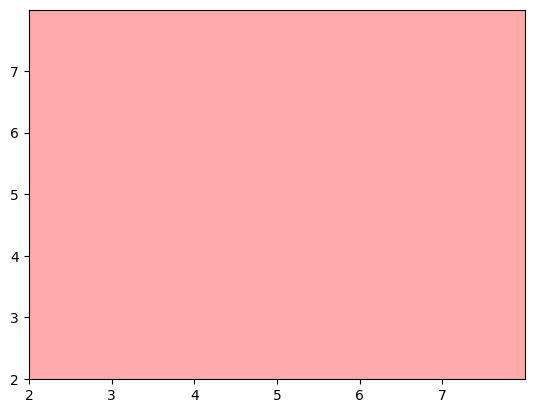

In [50]:
from matplotlib.colors import ListedColormap

df_apple = df[df['label'] == 'Apple']
df_orange = df[df['label'] == 'Orange']
Z = np.array(Z).reshape(xx.shape)
label_to_int = {label: i for i, label in enumerate(['Orange', 'Apple'])}
Z_numerical = np.vectorize(label_to_int.get)(Z)
Z_numerical = Z_numerical.astype(int)
plt.pcolormesh(xx, yy, Z_numerical, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(df_apple['weight'], df_apple['sweetness'], c='red')
plt.scatter(df_orange['weight'], df_orange['sweetness'], c='orange')

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
model = KNeighborsClassifier(3, metric='euclidean')
X = df.drop(['label', 'id'], axis=1).values
Y = df['label']
model.fit(X, Y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [58]:
pred = model.predict([[165, 3.3]])

In [59]:
X, Y = df['weight'], df['sweetness']

x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = X.min() - 1, X.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

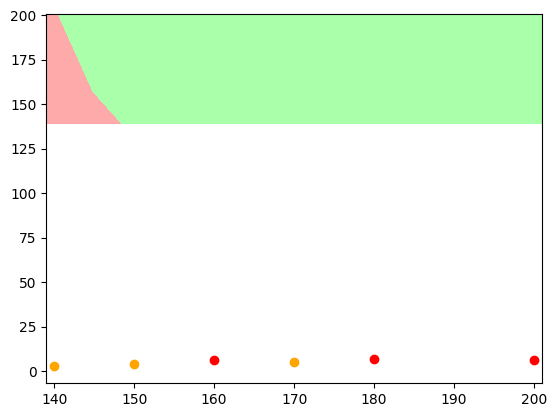

In [60]:
from matplotlib.colors import ListedColormap

df_apple = df[df['label'] == 'Apple']
df_orange = df[df['label'] == 'Orange']
Z = np.array(Z).reshape(xx.shape)
label_to_int = {label: i for i, label in enumerate(['Orange', 'Apple'])}
Z_numerical = np.vectorize(label_to_int.get)(Z)
Z_numerical = Z_numerical.astype(int)
plt.pcolormesh(xx, yy, Z_numerical, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(df_apple['weight'], df_apple['sweetness'], c='red')
plt.scatter(df_orange['weight'], df_orange['sweetness'], c='orange')

## Decision Trees

In [228]:
## ID3

class Node:
    def __init__(self, feature):
        self.feature = feature
        self.children = {}

class ID3:
    def __init__(self, labelCol='label'):
        self.labelCol = labelCol

    
    def entropy(self, df):
        total = df[self.labelCol].count()
        if total <= 0:
            return 0.0
        entropy = 0
        for count in df[self.labelCol].value_counts():
            p = count / total
            entropy -= p * np.log2(p)
        return entropy
    
    def info_gain(self, df, splitCol='split_idx'):
        total_entropy = self.entropy(df)
        total_len = len(df)
        weighted_entropy = 0
        for val in df[splitCol].unique():
            subset = df[df[splitCol] == val]
            weighted_entropy += (len(subset) / total_len) * self.entropy(subset)
        
        return total_entropy - weighted_entropy
    
    def recursion(self, df, cols):

        if len(cols) == 0:
            return Node(df[self.labelCol].value_counts().idxmax())

        info_gains = []
        for col in cols:
            info_gains.append(self.info_gain(df, col))
        
        max_info_gain_col = cols[np.argmax(info_gains)]

        tree = Node(max_info_gain_col)
        children = df[max_info_gain_col].unique()
        cols.remove(max_info_gain_col)
        for child in children:
            df_sub = df[df[max_info_gain_col] == child]
            tree.children[child] = self.recursion(df_sub, cols.copy())
        
        return tree

    
    def fit(self, df):
        cols = list(df.columns.values)
        cols.remove(self.labelCol)
        self.tree = self.recursion(df, cols)
    
    def print_tree_rec(self, tree=None):
        if not tree:
            return None

        tree_dict = {}
        tree_dict[tree.feature] = {}
        if not tree.children:
            return tree.feature
        for child in tree.children:
            tree_dict[tree.feature][child] = self.print_tree_rec(tree.children[child])
        
        return tree_dict
    
    def print_tree(self):
        if not self.tree:
            return None
        print(self.print_tree_rec(self.tree))
    
    def predict(self, data_dict):
        tree_node = self.tree

        while True:
            if not tree_node.children:
                return tree_node.feature
    
            tree_node = tree_node.children[data_dict[tree_node.feature]]

In [229]:
df = pd.read_csv('../Week8/datasets/q2_data.csv')

In [230]:
model = ID3(labelCol='Diagnosis')

In [231]:
model.entropy(df)

np.float64(1.0)

In [232]:
for feature in ['Age', 'Blood_Pressure', 'Cholesterol']:
    if feature == 'Age':
        df['AgeGroup'] = df['Age'].apply(lambda x: '<=45' if x <= 45 else '>45')
        ig = model.info_gain(df, 'AgeGroup')
        print(f"Information Gain ({feature}):", ig)
    else:
        ig = model.info_gain(df, feature)
        print(f"Information Gain ({feature}):", ig)

Information Gain (Age): 0.12451124978365313
Information Gain (Blood_Pressure): 1.0
Information Gain (Cholesterol): 1.0


In [233]:
model.fit(df.drop(['Id', 'Age'], axis=1))

In [234]:
model.print_tree()

{'Blood_Pressure': {'High': {'Cholesterol': {'High': {'AgeGroup': {'<=45': 'Sick', '>45': 'Sick'}}}}, 'Low': {'Cholesterol': {'Normal': {'AgeGroup': {'<=45': 'Healthy', '>45': 'Healthy'}}}}}}


In [213]:
data = {'Blood_Pressure': 'Low', 'Cholesterol': 'Normal', 'AgeGroup': '>45'}
model.predict(data)

'Healthy'

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
df

,Id,Age,Blood_Pressure,Cholesterol,Diagnosis,AgeGroup
0,1,30,High,High,Sick,<=45
1,2,45,Low,Normal,Healthy,<=45
2,3,50,High,High,Sick,>45
3,4,35,Low,Normal,Healthy,<=45
4,5,60,High,High,Sick,>45
5,6,55,Low,Normal,Healthy,>45
6,7,40,High,High,Sick,<=45
7,8,25,Low,Normal,Healthy,<=45
8,9,65,High,High,Sick,>45
9,10,45,Low,Normal,Healthy,<=45


In [237]:
for col in ['Blood_Pressure', 'Cholesterol', 'Diagnosis', 'AgeGroup']:
    df[col], _ = pd.factorize(df[col])

X = df.drop(['Id', 'Diagnosis'], axis=1).values
Y = df['Diagnosis']

In [238]:
X, Y

(array([[30,  0,  0,  0],
        [45,  1,  1,  0],
        [50,  0,  0,  1],
        [35,  1,  1,  0],
        [60,  0,  0,  1],
        [55,  1,  1,  1],
        [40,  0,  0,  0],
        [25,  1,  1,  0],
        [65,  0,  0,  1],
        [45,  1,  1,  0]]),
 0    0
 1    1
 2    0
 3    1
 4    0
 5    1
 6    0
 7    1
 8    0
 9    1
 Name: Diagnosis, dtype: int64)

In [239]:
model = DecisionTreeClassifier(max_depth=5)

model.fit(X, Y)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [240]:
model.predict(X)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [241]:
Y

0    0
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    1
Name: Diagnosis, dtype: int64

In [290]:
class Node:
    def __init__(self,feature):
        self.feature = feature
        self.children = {}

class C4_5:
    def __init__(self, labelCol='label'):
        self.labelCol = labelCol
    
    def entropy(self, df, feature=None):
        if not feature:
            feature = self.labelCol
        
        total_len = df[feature].count()
        if total_len == 0:
            return 0.0
        
        entropy = 0
        for count in df[feature].value_counts().values:
            p = count / total_len
            entropy -= p * np.log2(p)
        return entropy
    
    def info_gain(self, df, feature):
        total_entropy = self.entropy(df)
        total_len = df[feature].count()

        weighted_entropy = 0
        for val in df[feature].unique():
            subset = df[df[feature] == val]
            weighted_entropy += len(subset) / total_len * self.entropy(subset)
        return weighted_entropy
    
    def info_gain_ratio(self, df, feature):
        a = self.info_gain(df, feature)
        b = self.entropy(df, feature)
        if b > 0:
            return a/b
        return 0.0
    
    def recursion(self, df, cols):
        if not cols:
            return None
        
        infos = []
        for col in cols:
            infos.append(self.info_gain_ratio(df, col))
        
        best_feature = cols[np.argmax(infos)]
        cols.remove(best_feature)

        tree = Node(best_feature)

        for child in df[best_feature].unique():
            subset = df[df[best_feature] == child]
            tree.children[child] = self.recursion(subset, cols.copy())
        
        return tree
    
    def fit(self, df):
        cols = list(df.columns.values)
        cols.remove(self.labelCol)
        self.tree = self.recursion(df, cols.copy())
    
    def predict(self, data_dict):
        if not self.tree:
            return None
        
        cur_head = self.tree
        while True:
            if not cur_head.children:
                return cur_head.feature
            
            cur_head = cur_head.children[data_dict[cur_head.feature]]



In [291]:
df = pd.read_csv('../Week9/datasets/q1_data.csv')

In [292]:
model = C4_5(labelCol='Label')

In [293]:
model.fit(df.drop(['Temp.', 'Humid'], axis=1))

In [294]:
class CART:
    def __init__(self, labelCol):
        self.labelCol = labelCol
    
    def gini(self, df, feature=None):
        if not feature:
            feature = self.labelCol
        
        total_len = df[feature].count()
        if not total_len:
            return 0.0
        gini = 0
        for val in df[feature].value_counts().values:
            p = val / total_len
            gini += p**2
        
        return 1 - gini
    
    def gini_index(self, df, feature):
        total = df[feature].count()
        index = 0

        for val in df[feature].unique():
            subset = df[df[feature] == val]
            index += (len(subset) / total) * self.gini(df)
        
        return index
    
    def recursion(self, df, cols):
        if not cols:
            return None
        
        infos = []
        for col in cols:
            infos.append(self.gini_index(df, col))
        
        best_feature = cols[np.argmax(infos)]
        cols.remove(best_feature)

        tree = Node(best_feature)

        for child in df[best_feature].unique():
            subset = df[df[best_feature] == child]
            tree.children[child] = self.recursion(subset, cols.copy())
        
        return tree
    
    def fit(self, df):
        cols = list(df.columns.values)
        cols.remove(self.labelCol)
        self.tree = self.recursion(df, cols.copy())
    
    def predict(self, data_dict):
        if not self.tree:
            return None
        
        cur_head = self.tree
        while True:
            if not cur_head.children:
                return cur_head.feature
            
            cur_head = cur_head.children[data_dict[cur_head.feature]]

In [295]:
model = CART(labelCol='Label')

In [296]:
model.fit(df.drop(['Temp.', 'Humid'], axis=1))

In [297]:
model.tree